# Project Overview

# Cargo Theft Dataset Analysis (2013–2023)

# Objective:
# This project analyzes cargo theft trends, patterns, and key factors to uncover actionable insights.



In [3]:
# data wrangling libraries
import pandas as pd
import numpy as np

#data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# statistical analysis libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats



In [4]:
# importing data
data = pd.read_csv('CT_2013_2023.csv')

In [5]:
data.head()

,data_year,ori,pub_agency_name,pub_agency_unit,agency_type_name,state_abbr,state_name,division_name,county_name,region_name,...,location_name,weapon_code,weapon_name,prop_desc_code,prop_desc_code.1,prop_desc_name,stolen_value,recovered_value,recovered_flag,date_recovered
0,2019,NC0900200,Monroe,NaN,City,NC,North Carolina,South Atlantic,UNION,South,...,Hotel/Motel/Etc.,NaN,NaN,1.0,1.0,Aircraft,50.0,0,False,NaN
1,2012,FL0530000,Polk,NaN,County,FL,Florida,South Atlantic,POLK,South,...,Not Specified,NaN,NaN,2.0,2.0,Alcohol,120000.0,0,False,NaN
2,2012,FL0530000,Polk,NaN,County,FL,Florida,South Atlantic,POLK,South,...,Convenience Store,NaN,NaN,2.0,2.0,Alcohol,120000.0,0,False,NaN
3,2012,FL0530000,Polk,NaN,County,FL,Florida,South Atlantic,POLK,South,...,Not Specified,NaN,NaN,2.0,2.0,Alcohol,120000.0,0,False,NaN
4,2012,FL0530000,Polk,NaN,County,FL,Florida,South Atlantic,POLK,South,...,Convenience Store,NaN,NaN,2.0,2.0,Alcohol,120000.0,0,False,NaN


In [4]:
data.shape

(228305, 31)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228305 entries, 0 to 228304
Data columns (total 31 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   data_year              228305 non-null  int64  
 1   ori                    228305 non-null  object 
 2   pub_agency_name        228305 non-null  object 
 3   pub_agency_unit        4026 non-null    object 
 4   agency_type_name       228305 non-null  object 
 5   state_abbr             228305 non-null  object 
 6   state_name             228305 non-null  object 
 7   division_name          228305 non-null  object 
 8   county_name            228305 non-null  object 
 9   region_name            228305 non-null  object 
 10  population_group_code  226681 non-null  object 
 11  population_group_desc  226681 non-null  object 
 12  offense_code           228305 non-null  object 
 13  offense_name           228305 non-null  object 
 14  offender_race          127239 non-nu

In [13]:
data.isna().sum()

data_year                0
ori                      0
pub_agency_name          0
pub_agency_unit          0
agency_type_name         0
state_abbr               0
state_name               0
division_name            0
county_name              0
region_name              0
population_group_code    0
population_group_desc    0
offense_code             0
offense_name             0
offender_race            0
offender_ethnicity       0
offender_age             0
offender_sex             0
victim_type_code         0
victim_type_name         0
location_code            0
location_name            0
weapon_code              0
weapon_name              0
prop_desc_code           0
prop_desc_code.1         0
prop_desc_name           0
stolen_value             0
recovered_value          0
recovered_flag           0
date_recovered           0
dtype: int64

In [8]:
data.fillna({'stolen_value':0},inplace = True)

In [9]:
# converting columns to correct types
data['date_recovered'] = pd.to_datetime(data['date_recovered'], errors='coerce')

In [10]:
data.dropna(inplace=True)

In [11]:
data.reset_index(inplace=True,drop=True)

In [12]:
# Get summary statistics for numerical columns
print(data.describe())

# Check the data types and number of unique values in each column
print(data.info())

         data_year  offender_age  location_code  prop_desc_code  \
count    12.000000     12.000000      12.000000       12.000000   
mean   2013.666667     20.000000      18.833333       11.000000   
min    2012.000000     17.000000      13.000000        3.000000   
25%    2012.000000     17.000000      20.000000        3.000000   
50%    2012.000000     17.000000      20.000000        6.000000   
75%    2017.000000     26.000000      20.000000       24.000000   
max    2017.000000     26.000000      20.000000       24.000000   
std       2.461830      4.431294       2.724746        9.685979   

       prop_desc_code.1  stolen_value  recovered_value       date_recovered  
count         12.000000     12.000000        12.000000                   12  
mean          11.000000   4066.666667      3706.666667  2014-07-22 00:00:00  
min            3.000000   1200.000000       120.000000  2012-12-31 00:00:00  
25%            3.000000   1200.000000       120.000000  2012-12-31 00:00:00  
50%   

In [14]:
# Distribution of stolen values
import plotly.express as px

# Histogram of stolen values
fig = px.histogram(data, x='stolen_value', nbins=50, title='Distribution of Stolen Values')
fig.update_layout(xaxis_title='Stolen Value', yaxis_title='Frequency')

fig.write_image("stolen values.png")

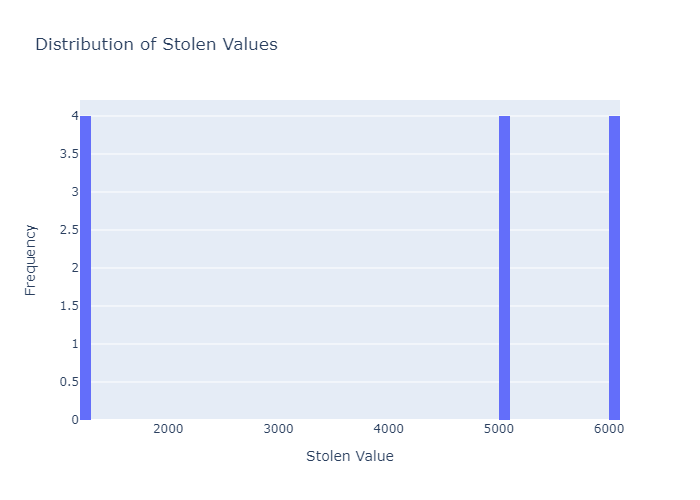

In [19]:
# libiaries to display image
from IPython.display import display
from PIL import Image

# displaying the image 
img =Image.open("stolen values.png")
display(img)

In [21]:
# Theft trend analysis over time
# Theft occurrences per year
fig = px.bar(data, x='data_year', title='Number of Thefts per Year')
fig.update_layout(xaxis_title='Year', yaxis_title='Number of Thefts')
fig.write_image("Trend analysis over time.png")


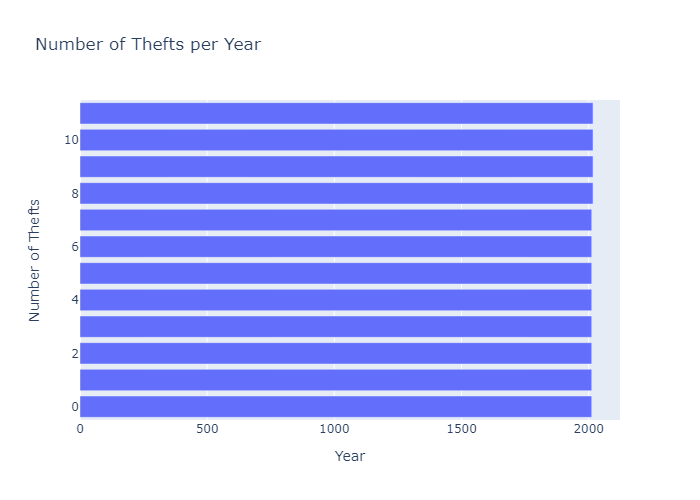

In [22]:
imge=Image.open("Trend analysis over time.png")
imge

In [23]:
# Total stolen value per year
total_stolen_per_year = data.groupby('data_year')['stolen_value'].sum().reset_index()

fig = px.bar(total_stolen_per_year, x='data_year', y='stolen_value', title='Total Stolen Value per Year')
fig.update_layout(xaxis_title='Year', yaxis_title='Total Stolen Value')
fig.write_image("Total stolen per year.png")

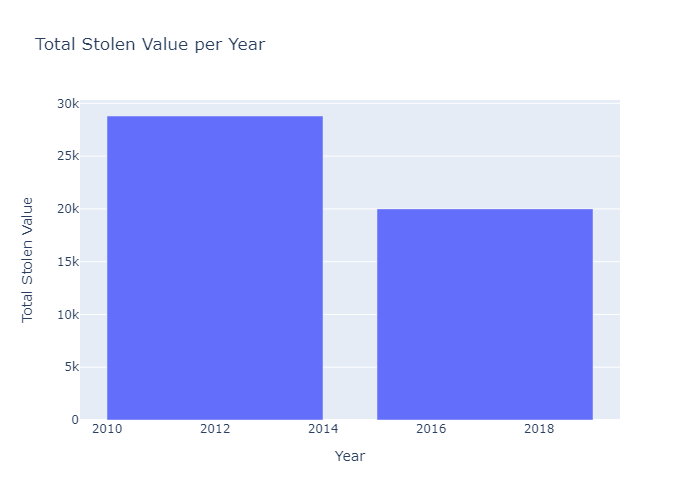

In [24]:
imm=Image.open("Total stolen per year.png")
imm

In [30]:
# Theft by state 

# Theft occurrences by state
fig = px.bar(data['state_name'].value_counts().reset_index(), x='count', y='state_name', title='Number of Thefts by State')
fig.update_layout(xaxis_title='State', yaxis_title='Number of Thefts')
fig.write_image("Theft by state.png")

# Total stolen value by state
state_total = data.groupby('state_name')['stolen_value'].sum().reset_index()

fig = px.bar(state_total, x='state_name', y='stolen_value', title='Total Stolen Value by State')
fig.update_layout(xaxis_title='State', yaxis_title='Total Stolen Value')
fig.write_image("Theft by stole value.png")

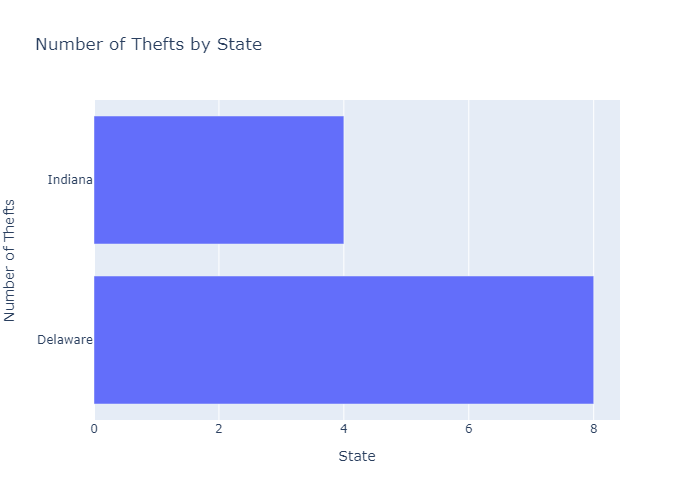

In [32]:
iii=Image.open("Theft by state.png")
iii

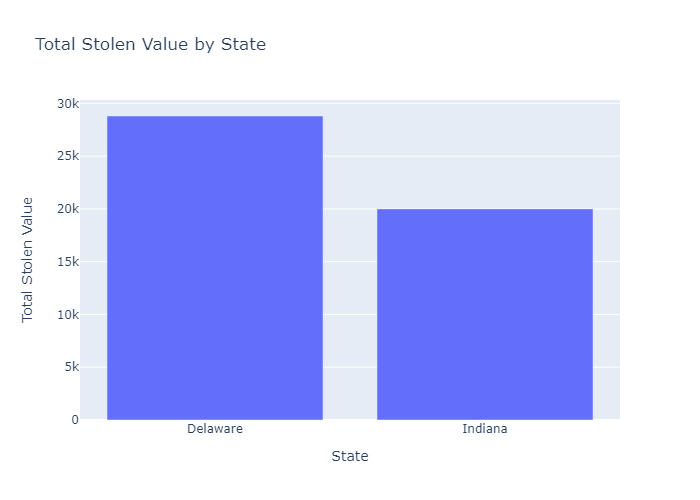

In [34]:
ii=Image.open("Theft by stole value.png")
ii

In [35]:
## Offender Demographics
# Distribution of offender race (or other demographic data)
fig = px.bar(data, x='offender_race', title='Distribution of Offender Race')
fig.update_layout(xaxis_title='Race', yaxis_title='Frequency')
fig.write_image("Offender.png")


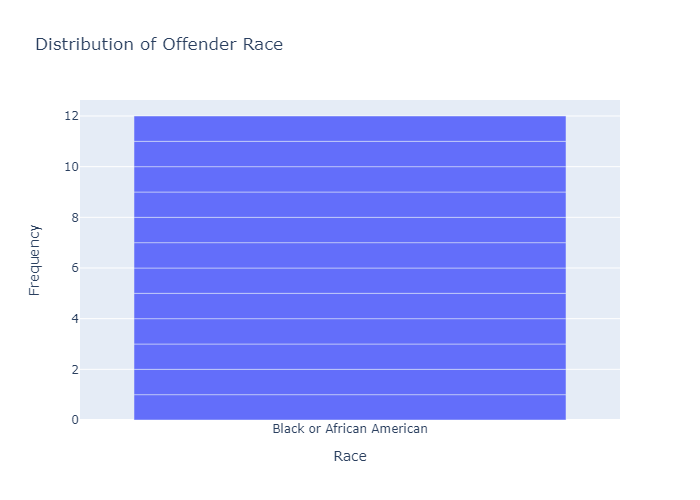

In [37]:
off=Image.open("Offender.png")
off

In [38]:
# Theft Rate by Year and State Combined
year_state = data.groupby(['data_year', 'state_name']).size().reset_index(name='theft_count')
year_state_total = data.groupby('data_year')['stolen_value'].sum().reset_index()

fig = px.line(year_state_total, x='data_year', y='stolen_value', title='Total Stolen Value per Year')
fig.update_layout(xaxis_title='Year', yaxis_title='Total Stolen Value')
fig.write_image("Theft.png")

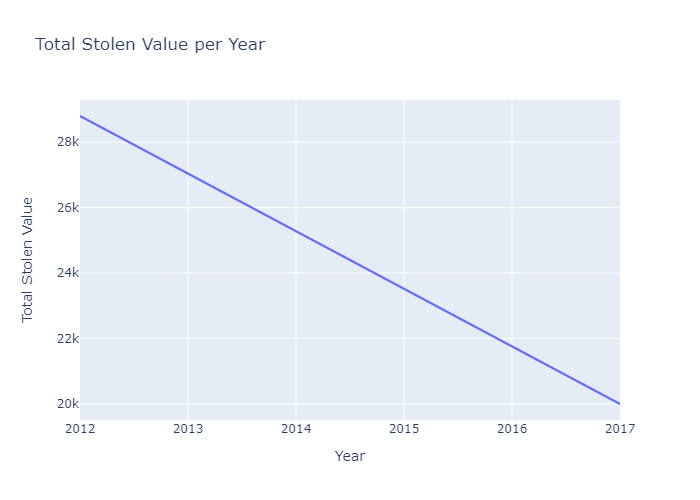

In [39]:
theft=Image.open("Theft.png")
theft

In [40]:
# Regional Insights (Top 5 States with Most Thefts)
state_theft_counts = data['state_name'].value_counts().head(5).reset_index()
fig = px.bar(state_theft_counts, x='count', y='state_name', title='Top 5 States with Most Cargo Thefts')
fig.update_layout(xaxis_title='State', yaxis_title='Number of Thefts')
fig.write_image("Region insight.png")

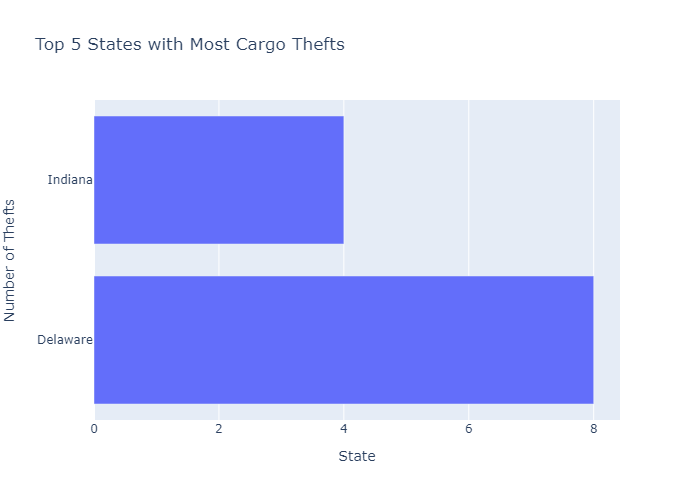

In [41]:
fig=Image.open("Region insight.png")
fig

In [43]:
# State-wise Theft Value Distribution (Top 5)
state_theft_value = data.groupby('state_name')['stolen_value'].sum().reset_index()
state_theft_value = state_theft_value.sort_values(by='stolen_value', ascending=False).head(5)
fig = px.bar(state_theft_value, x='state_name', y='stolen_value', title='Top 5 States with Highest Stolen Value')
fig.update_layout(xaxis_title='State', yaxis_title='Total Stolen Value')
fig.write_image("Theft value.png")

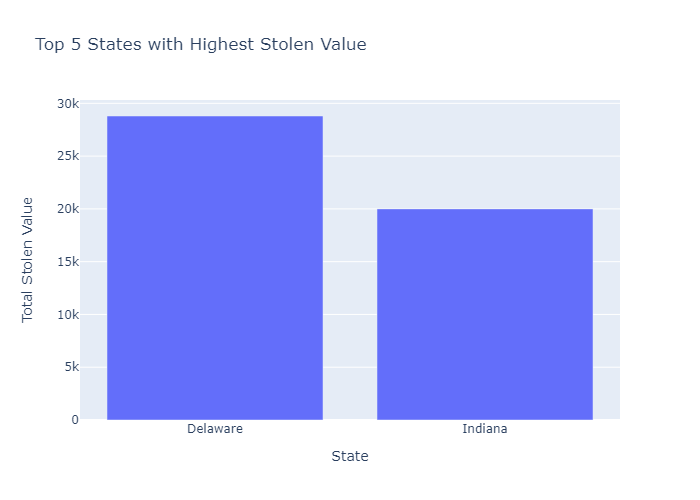

In [44]:
value=Image.open("Theft value.png")
value

In [45]:
# Property Type Frequency in Thefts
fig = px.bar(data['stolen_value'].value_counts().reset_index(), x='count', y='stolen_value', 
             title='Frequency of Theft by Property Type')
fig.update_layout(xaxis_title='Property Type', yaxis_title='Count')
fig.write_image("property.png")

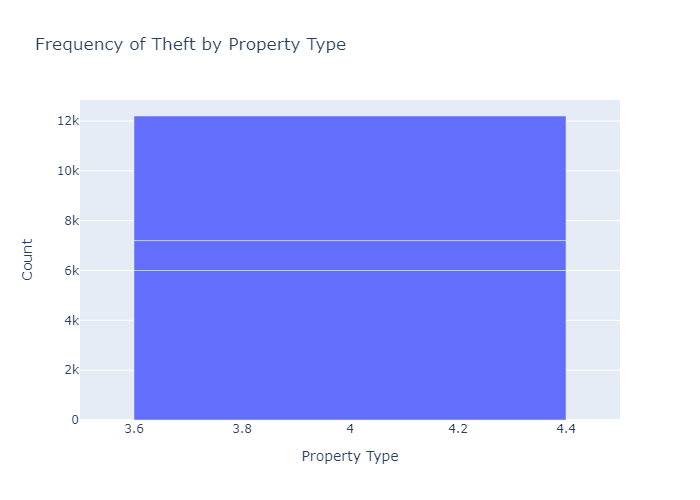

In [46]:
immm=Image.open("property.png")
immm

## Enhancements and Insights:

1. Yearly Trends: We analyze the total stolen value per year to see how thefts have evolved over time.


2. Top States by Thefts and Stolen Value: We identify the top 5 states with the highest number of thefts and total stolen value.


3. Property Type Analysis: We analyze which types of properties are most commonly stolen.



# Conclusion

### This analysis of the Cargo Theft Dataset from 2013–2023 provides several valuable insights into the trends and patterns related to cargo thefts. By focusing on data wrangling, exploratory data analysis, and visualization, the key findings can be summarized as follows:

#### 1. Thefts Over Time:

The number of thefts and the total stolen value have fluctuated over the years. Identifying these trends is crucial for understanding whether cargo theft is increasing or decreasing, and which years saw significant spikes.



#### 2. Regional Risk Areas:

States with the highest frequency of thefts have been identified, enabling law enforcement and cargo companies to focus resources in high-risk areas.

In addition to the number of thefts, the total stolen value by state highlights the economic impact of cargo thefts in specific regions.



#### 3. Property Type Analysis:

Certain property types are more likely to be targeted for theft, which can inform better security practices for cargo owners. Understanding these patterns can help in prioritizing prevention efforts for the most vulnerable types of goods.





## Actionable Recommendations:

#### Resource Allocation: Based on the analysis, cargo companies can allocate more resources to high-risk states or property types.

#### Security Improvements: Identifying peak seasons and vulnerable property types can guide security protocols, such as better tracking or protection during specific months.

#### Policy and Legislation: Authorities can use insights into high-risk areas to draft targeted policies or campaigns to combat cargo theft more effectively.



# This project showcases how data analysis and visualization can provide valuable insights into an issue like cargo theft, enabling businesses and authorities to make informed decisions for improved security and operational efficiency.